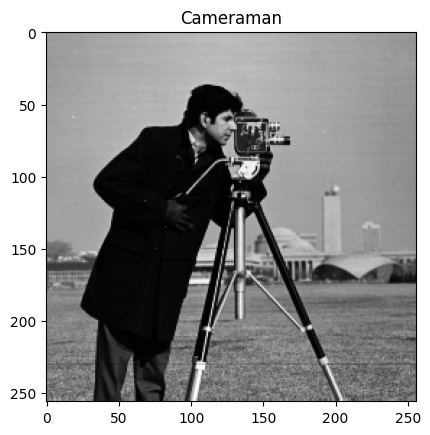

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image using OpenCV. If the image path is incorrect, cv2.imread will return None.
image = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully.
if image is None:
    print("Error: Could not load image. Please check the image path.")
else:
    # Display the image using Matplotlib.
    plt.imshow(image, cmap='gray')
    plt.title('Cameraman')
    plt.show()

In [2]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Salt noise
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Pepper noise
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

# Add noise to image
noisy_image = add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)

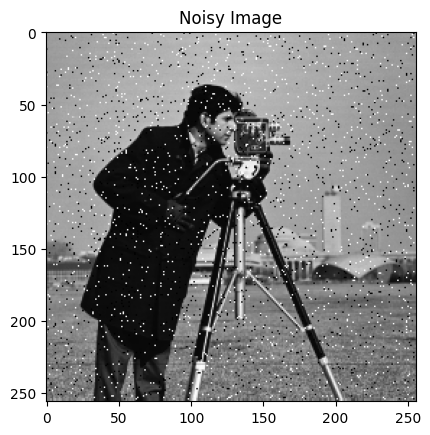

In [3]:
# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.show()

In [4]:
# (i) Box filter from scratch
def box_filter(image, size):
    padded = np.pad(image, size // 2, mode='constant', constant_values=0)
    result = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i, j] = np.mean(padded[i:i+size, j:j+size])
    
    return result

# (ii) Median filter from scratch
def median_filter(image, size):
    padded = np.pad(image, size // 2, mode='constant', constant_values=0)
    result = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i, j] = np.median(padded[i:i+size, j:j+size])
    
    return result

# (iii) Max filter from scratch
def max_filter(image, size):
    padded = np.pad(image, size // 2, mode='constant', constant_values=0)
    result = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i, j] = np.max(padded[i:i+size, j:j+size])
    
    return result

# (iii) Min filter from scratch
def min_filter(image, size):
    padded = np.pad(image, size // 2, mode='constant', constant_values=0)
    result = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i, j] = np.min(padded[i:i+size, j:j+size])
    
    return result

# (iv) Gaussian filter from scratch
def gaussian_filter(image, size, sigma):
    pad_size = size // 2
    padded = np.pad(image, pad_size, mode='constant', constant_values=0)
    result = np.zeros_like(image)

    # Create Gaussian kernel
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * 
                     np.exp(-((x - pad_size) ** 2 + (y - pad_size) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    kernel /= np.sum(kernel)

    # Apply filter
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i, j] = np.sum(padded[i:i+size, j:j+size] * kernel)
    
    return result

In [5]:

# Apply filters
box_filtered = box_filter(noisy_image, 9)
median_filtered = median_filter(noisy_image, 9)
max_filtered = max_filter(noisy_image, 9)
min_filtered = min_filter(noisy_image, 9)
gaussian_filtered = gaussian_filter(noisy_image, 9, sigma=1.0)

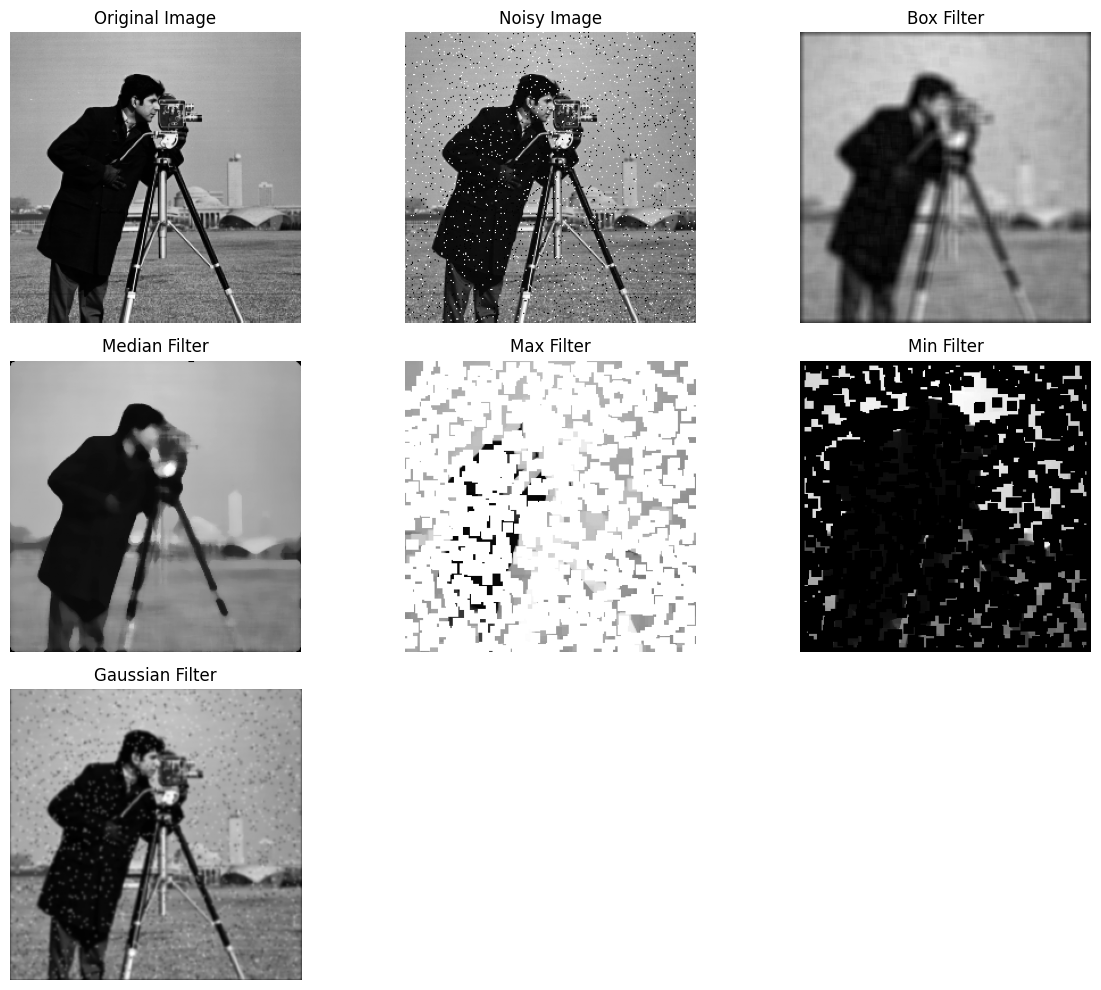

In [6]:
# Plot results
plt.figure(figsize=(12, 10))
titles = ['Original Image', 'Noisy Image', 'Box Filter', 'Median Filter', 'Max Filter', 'Min Filter', 'Gaussian Filter']
images = [image, noisy_image, box_filtered, median_filtered, max_filtered, min_filtered, gaussian_filtered]

for i in range(7):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    cv2.imwrite(f"./{titles[i].replace(' ', '_').lower()}.png", images[i])

plt.tight_layout()
plt.show()